# General Opioid, Fentanyl, Heroin, and Prescription Opioids Related Death - Data Exploration

In [3]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()

In [8]:
#Load Data 
df = pd.read_csv('/home/jovyan/Capstone Project Stuff/Data/Merged_deaths_by_county_2015_2020.csv')
df.head()

,Unnamed: 0,County,Rates_opioid,Counts_opioid,Year,Rates_pres,Counts_pres,Rates_heroin,Counts_heroin,Rates_fentanyl,Counts_fentanyl
0,0,Alameda,3.82,68.0,2015,2.73,50.0,0.66,11.0,0.24,4.0
1,1,Alpine,0.00,0.0,2015,0.00,0.0,0.00,0.0,0.00,0.0
2,2,Amador,3.75,2.0,2015,3.75,2.0,0.00,0.0,0.00,0.0
3,3,Butte,7.48,18.0,2015,6.51,16.0,0.44,1.0,0.33,1.0
4,4,Calaveras,17.97,9.0,2015,14.25,7.0,3.28,1.0,2.81,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       330 non-null    int64  
 1   County           330 non-null    object 
 2   Rates_opioid     330 non-null    float64
 3   Counts_opioid    330 non-null    float64
 4   Year             330 non-null    int64  
 5   Rates_pres       330 non-null    float64
 6   Counts_pres      330 non-null    float64
 7   Rates_heroin     330 non-null    float64
 8   Counts_heroin    330 non-null    float64
 9   Rates_fentanyl   330 non-null    float64
 10  Counts_fentanyl  330 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 28.5+ KB


In [6]:
# Check the statistical distributions of all data
df.describe()

,Unnamed: 0,Rates_opioid,Counts_opioid,Year,Rates_pres,Counts_pres,Rates_heroin,Counts_heroin,Rates_fentanyl,Counts_fentanyl
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,164.500000,7.891576,50.321212,2017.500000,6.163758,39.015152,1.794364,13.260606,2.393242,20.633333
std,95.407023,6.806728,115.471176,1.710419,6.036292,94.946456,2.163083,31.753878,4.188342,74.840268
min,0.000000,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,82.250000,3.327500,3.000000,2016.000000,2.295000,2.250000,0.000000,0.000000,0.000000,0.000000
50%,164.500000,6.410000,14.000000,2017.500000,4.385000,9.500000,1.135000,3.000000,0.755000,2.000000
75%,246.750000,10.067500,39.000000,2019.000000,7.805000,34.000000,2.617500,9.000000,3.142500,9.000000
max,329.000000,44.510000,1300.000000,2020.000000,41.940000,1099.000000,13.060000,290.000000,38.100000,970.000000


## 0- Exploring Descriptive Statistics of Opioid Related Death Data

In [8]:
# Check the statistical distributions of 'Counts'
df[['Counts_opioid','Counts_pres','Counts_heroin','Counts_fentanyl']].describe()

,Counts_opioid,Counts_pres,Counts_heroin,Counts_fentanyl
count,330.000000,330.000000,330.000000,330.000000
mean,50.321212,39.015152,13.260606,20.633333
std,115.471176,94.946456,31.753878,74.840268
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.250000,0.000000,0.000000
50%,14.000000,9.500000,3.000000,2.000000
75%,39.000000,34.000000,9.000000,9.000000
max,1300.000000,1099.000000,290.000000,970.000000


In [20]:
df[['Rates_opioid','Rates_pres','Rates_heroin','Rates_fentanyl']].describe()

,Rates_opioid,Rates_pres,Rates_heroin,Rates_fentanyl
count,330.000000,330.000000,330.000000,330.000000
mean,7.891576,6.163758,1.794364,2.393242
std,6.806728,6.036292,2.163083,4.188342
min,0.000000,0.000000,0.000000,0.000000
25%,3.327500,2.295000,0.000000,0.000000
50%,6.410000,4.385000,1.135000,0.755000
75%,10.067500,7.805000,2.617500,3.142500
max,44.510000,41.940000,13.060000,38.100000


### Summary of Descriptive Statistics

* After exploring the statistical data we noticed prescription opiates has the larger average number of death counts than illegal opiates such as fentanyl and heroin.
* The statistical data on opioid related death rates is consistent with the death counts data table; Showing average general opioid, followed by prescription opioid, fentanyl, followed by heroin related deaths.


# 1- Visualization of Opioid Related Death Counts over Time 

* Create a visualization for General Opioid, Fentanyl, Heroin, and Prescription related deaths by year 
* What trends do we see? 


### General Opioid Related Death Count Over Time 2015-2020 

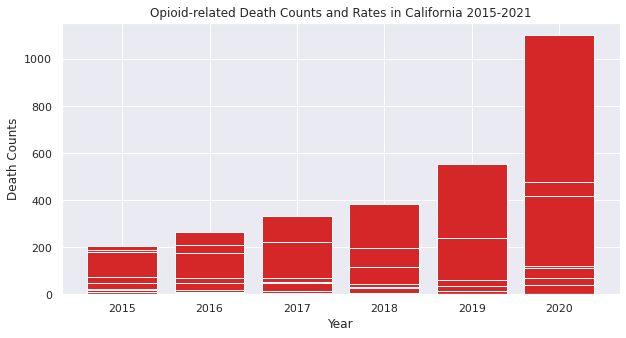

In [28]:
#Plot General Opioid Death Counts from 2015 -2020
fig,ax1 = plt.subplots(figsize=(10,5))
x = df["Year"]
y = df["Counts_opioid"]

color = 'tab:red'
ax1.set_xlabel("Year")
ax1.set_ylabel("Death Counts")
ax1.set_title("Opioid-related Death Counts and Rates in California 2015-2021")
ax1.bar(x,y1,color=color)



plt.show()

### Fentanyl Related Deaths Count Over Time 2015-2020 


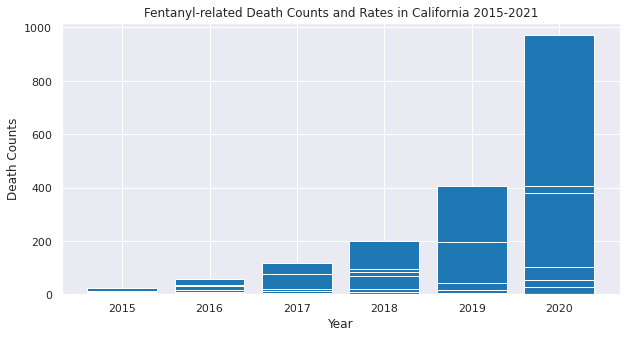

In [29]:
#Plot Fentanyl Death Counts from 2015 -2020
fig,ax1 = plt.subplots(figsize=(10,5))
x = df["Year"]
y1 = df["Counts_fentanyl"]

color = 'tab:blue'
ax1.set_xlabel("Year")
ax1.set_ylabel("Death Counts")
ax1.set_title("Fentanyl-related Death Counts and Rates in California 2015-2021")
ax1.bar(x,y1,color=color)


plt.show()

### Heroin Related Deaths Count Over Time 2015-2020 



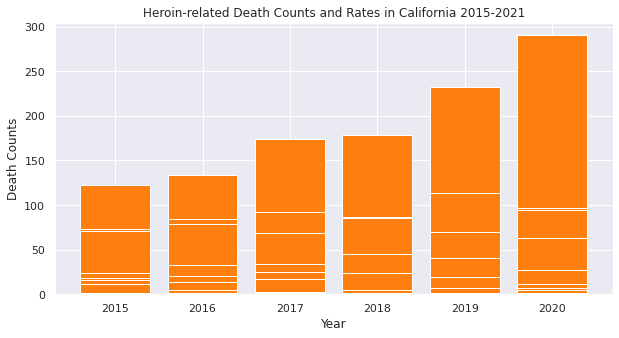

In [30]:
#Plot Heroin Death Counts from 2015 -2020
fig,ax1 = plt.subplots(figsize=(10,5))
x = df["Year"]
y1 = df["Counts_heroin"]

color = 'tab:Orange'
ax1.set_xlabel("Year")
ax1.set_ylabel("Death Counts")
ax1.set_title("Heroin-related Death Counts and Rates in California 2015-2021")
ax1.bar(x,y1,color=color)


plt.show()

### Prescriptions Related Deaths Count Over Time 2015-2020 

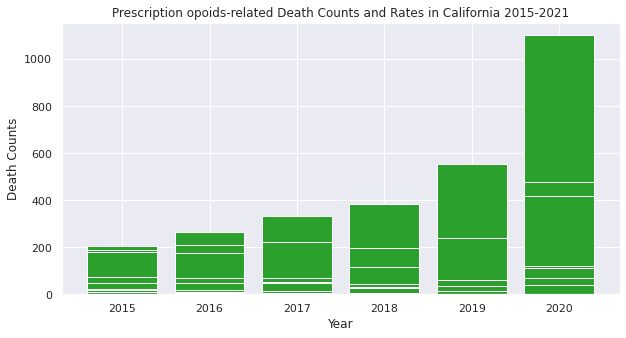

In [31]:
#Plot Prescription Death Counts from 2015 -2020
fig,ax1 = plt.subplots(figsize=(10,5))
x = df["Year"]
y1 = df["Counts_pres"]

color = 'tab:Green'
ax1.set_xlabel("Year")
ax1.set_ylabel("Death Counts")
ax1.set_title("Prescription opoids-related Death Counts and Rates in California 2015-2021")
ax1.bar(x,y1,color=color)


plt.show()

### Summary of Death Counts Over Time 

* We see that there has been an increase in Opioid related deaths including recreational Opioids. 
* We observe that Fentanyl has a potentially significant increase in death counts from 2015 to 2020. 

## 2- Correlations between Opioids

* What is the correlation between General Opioid related deaths and Fentanyl?
* What is the correlation between General Opioid related deaths and Heroin?
* What is the correlation between General Opioid related deaths and Prescripiton Opioids?

In [46]:
#Correlation between General Opiods, prescription, heroin, and fentanyl related death counts
df[['Counts_opioid','Counts_pres','Counts_heroin','Counts_fentanyl']].corr()

,Counts_opioid,Counts_pres,Counts_heroin,Counts_fentanyl
Counts_opioid,1.000000,0.994908,0.944442,0.921057
Counts_pres,0.994908,1.000000,0.911005,0.947288
Counts_heroin,0.944442,0.911005,1.000000,0.775680
Counts_fentanyl,0.921057,0.947288,0.775680,1.000000


### Summary of Correlations between Opiod related Death Variables 

* As we expected, the relationship between general opioid overdose and other opioids including heroin, fentanyl, and prescription opiates are positive correlated meaning, as general opioid death counts increase, the other types of opiods follow

* We did this to examine how the datasets compare, since general opioid deaths and the other opiods were from separate data sets


## 3- Total Opioid Related Deaths by County 2015-2020

* Choose visualization that shows which counties had the highest rate of deaths for general opioid related deaths 
* How does this differ when compared to general opioid related death rates?

### Total General Opioid Related Death Counts & Rates by County 2015-2020

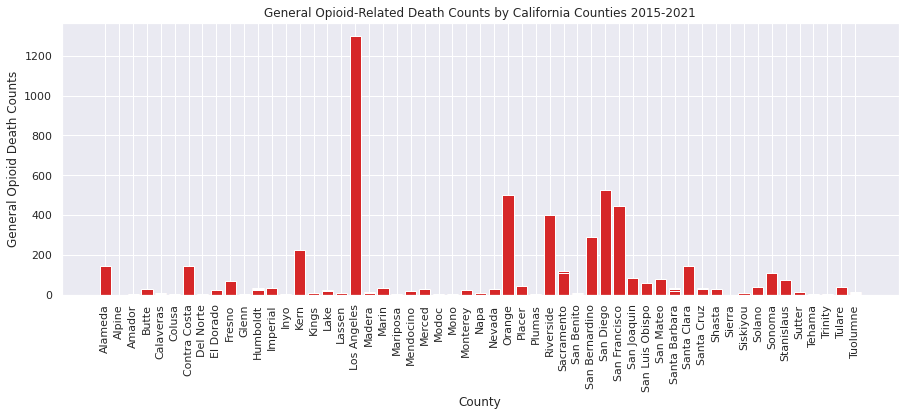

In [16]:
#Plot General Opioid Death Counts by County from 2015 -2020
fig,ax1 = plt.subplots(figsize=(15,5))
x = df["County"]
y = df["Counts_opioid"]

color = 'tab:red'
ax1.set_xlabel("County")
ax1.set_ylabel("General Opioid Death Counts")
ax1.set_title("General Opioid-Related Death Counts by California Counties 2015-2021")
ax1.bar(x,y,color=color)

plt.xticks(rotation=90)

plt.show()

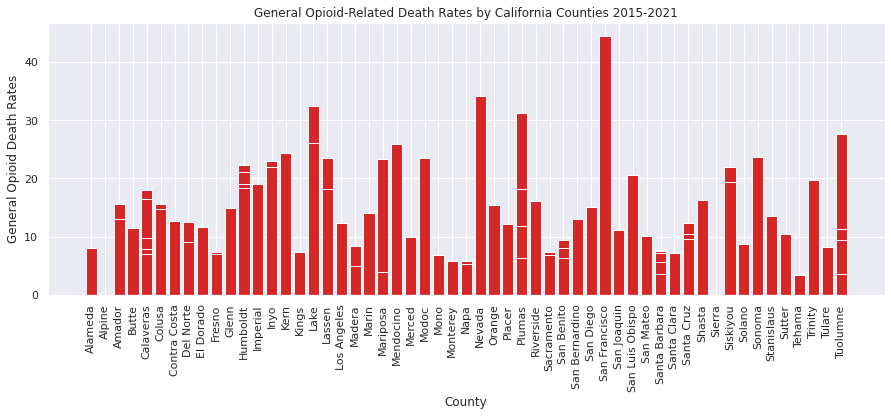

In [19]:
#Plot General Opioid Death Rates by County from 2015 -2020
fig,ax1 = plt.subplots(figsize=(15,5))
x = df["County"]
y = df["Rates_opioid"]

color = 'tab:red'
ax1.set_xlabel("County")
ax1.set_ylabel("General Opioid Death Rates")
ax1.set_title("General Opioid-Related Death Rates by California Counties 2015-2021")
ax1.bar(x,y,color=color)

plt.xticks(rotation=90)

plt.show()

### Total Fentanyl Related Death Counts & Rates by County 2015-2020


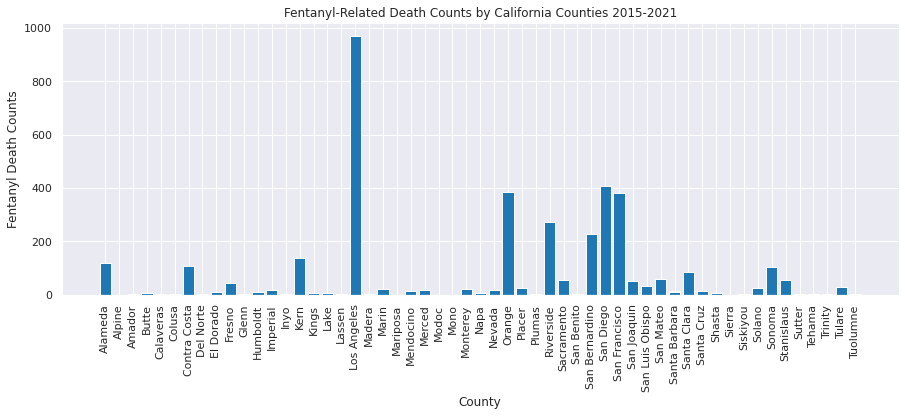

In [22]:
#Plot Fentanyl Death Counts by County from 2015 -2020
fig,ax1 = plt.subplots(figsize=(15,5))
x = df["County"]
y = df["Counts_fentanyl"]

color = 'tab:blue'
ax1.set_xlabel("County")
ax1.set_ylabel("Fentanyl Death Counts")
ax1.set_title("Fentanyl-Related Death Counts by California Counties 2015-2021")
ax1.bar(x,y,color=color)

plt.xticks(rotation=90)

plt.show()

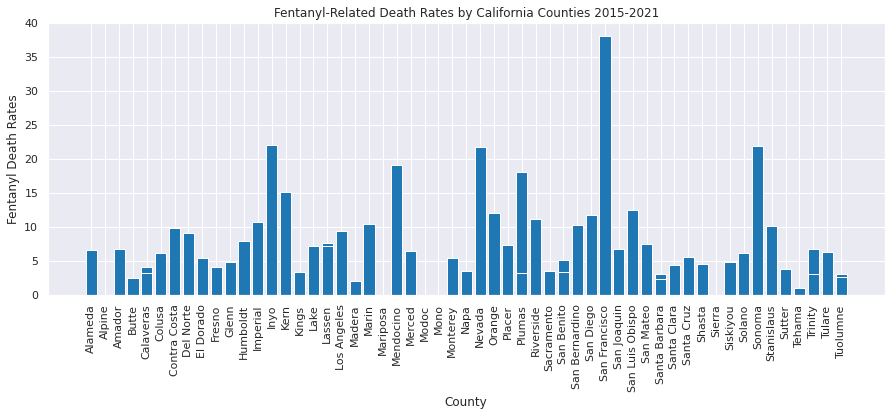

In [23]:
#Plot Fentanyl Death Counts by County from 2015 -2020
fig,ax1 = plt.subplots(figsize=(15,5))
x = df["County"]
y = df["Rates_fentanyl"]

color = 'tab:blue'
ax1.set_xlabel("County")
ax1.set_ylabel("Fentanyl Death Rates")
ax1.set_title("Fentanyl-Related Death Rates by California Counties 2015-2021")
ax1.bar(x,y,color=color)

plt.xticks(rotation=90)

plt.show()

### Total Heroin Related Death Counts & Rates by County 2015-2020


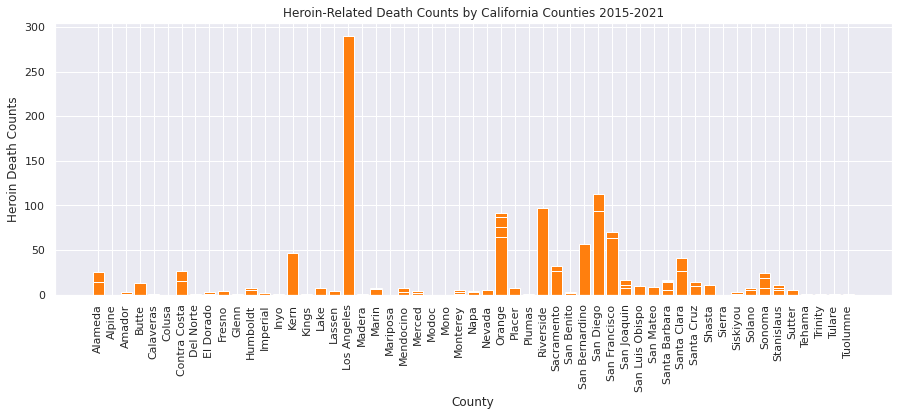

In [25]:
#Plot Heroin Death Counts by County from 2015 -2020
fig,ax1 = plt.subplots(figsize=(15,5))
x = df["County"]
y = df["Counts_heroin"]

color = 'tab:orange'
ax1.set_xlabel("County")
ax1.set_ylabel("Heroin Death Counts")
ax1.set_title("Heroin-Related Death Counts by California Counties 2015-2021")
ax1.bar(x,y,color=color)

plt.xticks(rotation=90)

plt.show()

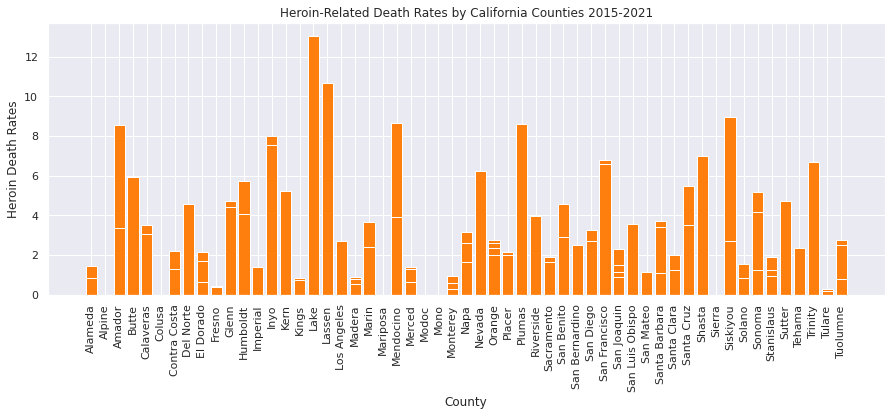

In [26]:
#Plot Heroin Death Rates by County from 2015 -2020
fig,ax1 = plt.subplots(figsize=(15,5))
x = df["County"]
y = df["Rates_heroin"]

color = 'tab:orange'
ax1.set_xlabel("County")
ax1.set_ylabel("Heroin Death Rates")
ax1.set_title("Heroin-Related Death Rates by California Counties 2015-2021")
ax1.bar(x,y,color=color)

plt.xticks(rotation=90)

plt.show()

### Total Prescription Opioid Related Death Counts & Rates by County 2015-2020


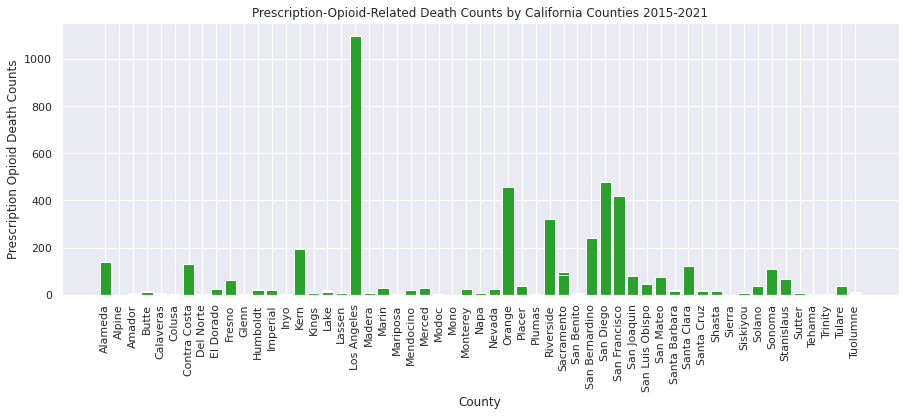

In [27]:
#Plot Heroin Death Counts by County from 2015 -2020
fig,ax1 = plt.subplots(figsize=(15,5))
x = df["County"]
y = df["Counts_pres"]

color = 'tab:green'
ax1.set_xlabel("County")
ax1.set_ylabel("Prescription Opioid Death Counts")
ax1.set_title("Prescription-Opioid-Related Death Counts by California Counties 2015-2021")
ax1.bar(x,y,color=color)

plt.xticks(rotation=90)

plt.show()

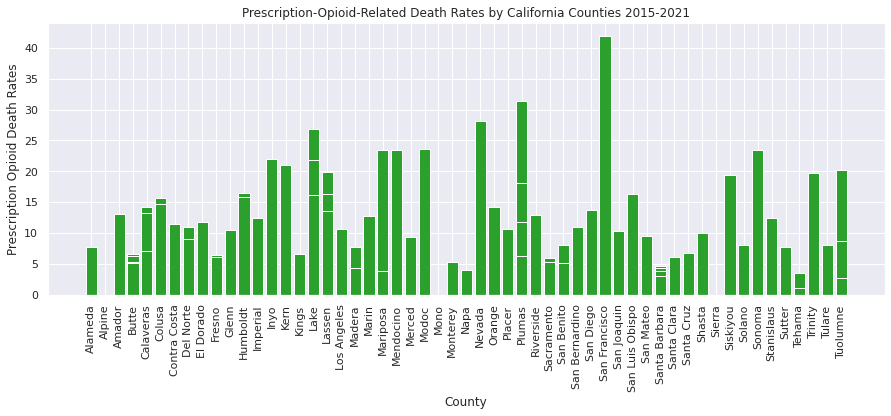

In [29]:
#Plot Heroin Death Counts by County from 2015 -2020
fig,ax1 = plt.subplots(figsize=(15,5))
x = df["County"]
y = df["Rates_pres"]

color = 'tab:green'
ax1.set_xlabel("County")
ax1.set_ylabel("Prescription Opioid Death Rates")
ax1.set_title("Prescription-Opioid-Related Death Rates by California Counties 2015-2021")
ax1.bar(x,y,color=color)

plt.xticks(rotation=90)

plt.show()

### Summary of Total Opioid Related Deaths by County 2015-2020

It seems that Los Angeles has the highest opioid related death counts. This could be do to population size and density. San Franscico seems to have the highest opioid related death rates. 

* General Opioid 
    * For General Opioid related deaths counts over 2015-2020, Los Angeles Seems to have the highest death count
    * When we look at death rates we see that over 2015-2020 San Francsico has had the highest rates of opioid related deaths, meaning San Francisco has the highest number of general opioid related deaths for every 100k residents  

* Fentanyl
    * For Fentanyl related death counts: Los Angeles county has the highest count 
    * For Fentanyl related death rates: San Franscico county has the highest rate 

* Heroin
    * For Heroin related death counts: Los Angeles county has the highest count 
    * For Heroin related death rates: Lake county has the highest rate 

* Prescription Opioids
    * For Prescription Opioid related death counts: Los Angeles county has the highest count 
    * For Prescription Opioid related death rates: San Franscico county has the highest rate 


